- 성적 : 점수(연속된 숫자)로 평가 -> 회귀분석

### 딥러닝에서 사용할 프레임워크
- Tensorflow(Tensorflow + Keras)
- 복잡한 신경망을 블록 형태로 쉽게 구현하도록 만든 딥러닝 프레임워크

In [1]:
# mount() : 장치를 특정한 위치에 연결해주는 함수
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 파일이 있는 곳으로 기본경로 잡아주기
%cd /content/drive/MyDrive/Colab Notebooks/딥러닝

In [3]:
# 현재 우리 위치 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/딥러닝


In [ ]:
# 텐서플로우 설치 코드
# !pip install tensorflow

In [7]:
# 텐서플로우 버전 확인
import tensorflow as tf
print(tf.__version__)
# 만약 moduleNotFoundError :  모듈이 설치가 되어있지 않다!

2.15.0


### 목표 설정
- 학생 성적 데이터를 이용해서 수학 성적을 예측하는 회귀 모델을 만들어보자!
- tensorflow.keras를 이용해서 신경망을 구현하는 방법을 알아보자.

In [8]:
# 기초 3종 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# 데이터 불러오기
data = pd.read_csv('data/student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [13]:
# 중간에 생략된 컬럼 전체 확인해보기
pd.set_option('display.max_columns', None)

In [14]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [15]:
# 결측치 확인 - 결측치 없음! / object, int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [24]:
# 문제와 정답으로 분리

# 정답 데이터 -> 수학 점수 - G3
y = data['G3']

# 문제 데이터 -> school ~ absences
X = data.loc[:, 'school':'absences']
# X = data.iloc[:, 0:30]

In [26]:
X.shape, y.shape

((395, 30), (395,))

In [27]:
# 훈련 / 평가셋 분리
# train_test_split - 평가셋 30%, 랜덤시드 = 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 30), (119, 30), (276,), (119,))

### 신경망 모델 만들기
1. 신경망 구조 설계
2. 신경망 학습과 평가방법 설정
3. 학습 및 학습 과정 시각화
4. 모델 평가 및 예측

In [29]:
# 신경망 구조 재료 가져오기(import)
# Sequential : 신경망 모델의 뼈대를 구현하는 함수
# 각자의 층을 선형으로 연결해주는 역할을 담당
from tensorflow.keras.models import Sequential

# Dense : 신경망의 층(뉴런의 묶음)을 설정하고 구성해주는 함수
# Activation : 활성화를 시켜주는 함수
from tensorflow.keras.layers import Dense, Activation

In [30]:
# 딥러닝은 뼈대에 층을 하나하나 차곡차곡 쌓아주는 형태로 구현
# 입력층 -> 중간층 -> 출력층의 순서로 구현

model = Sequential()

# 입력층 설정
model.add(Dense(units=4,   # add : 층을 추가하는 함수 / units : 뉴런의 개수 설정
                input_dim=1))  # input_dim : 입력할 데이터가 가진 특성의 개수(사용할 특성의 개수)
model.add(Activation('sigmoid'))

# 출력층 설정
model.add(Dense(units=1))

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# 2. 신경망 학습 / 평가 방법 설정
# compile() : 앞서 만든 모델이 효과적으로 구현될 수 있도록 환경 설정을 하면서 읽어오는 함수
# 모델을 학습시키기 전 손실함수, 최적화 방법, 평가지표를 설정하는 부분
model.compile(loss='mse',  # 손실함수 : 현재는 회귀 분석 진행 중. 평균 제곱 오차를 이용해서 오차 체크
              optimizer='SGD',  # SGD : 최적화 함수, 모델의 성능을 최적화시키는 방법 설정 -> 확률적 경사하강법
              # metrics = 'mse' # 모델의 성능 평가 지표 설정 부분 / 평가지표
              )

In [33]:
# 3. 모델 학습
# epochs = 학습을 얼마나 시킬 것인가
# h = model.fit(X_train, y_train, epochs = 100)
# X_train에 있는 특성의 개수(30개)와 input_dim(특성의 개수;1개)가 다름 -> 오류 발생!
h = model.fit(X_train['studytime'], y_train, epochs = 100)

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 95.8144
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 52.1561
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 30.8556
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 23.8259
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 21.7499
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 21.1066
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 20.8933
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 20.8224
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 20.7920
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 20.7584
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 20.7858
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 20.7718
Epoch 13/100
9/9 [==============================]

In [34]:
# h라는 변수 안에는 loss와 optimizer가 리스트 형태로 쌓인다!
h.history['loss']  # 학습을 진행할 때 어떤 오차를 가지고 있는가

[95.81437683105469,
 52.156124114990234,
 30.855567932128906,
 23.82585334777832,
 21.749866485595703,
 21.106643676757812,
 20.89329719543457,
 20.822406768798828,
 20.79203224182129,
 20.758434295654297,
 20.785816192626953,
 20.771804809570312,
 20.757963180541992,
 20.760339736938477,
 20.773035049438477,
 20.783300399780273,
 20.774892807006836,
 20.775650024414062,
 20.755722045898438,
 20.785348892211914,
 20.765186309814453,
 20.79054832458496,
 20.756118774414062,
 20.803070068359375,
 20.793516159057617,
 20.77431297302246,
 20.77156639099121,
 20.775650024414062,
 20.794296264648438,
 20.77052879333496,
 20.77638053894043,
 20.77871322631836,
 20.7860164642334,
 20.775039672851562,
 20.765562057495117,
 20.777986526489258,
 20.770523071289062,
 20.767303466796875,
 20.77206802368164,
 20.797565460205078,
 20.764432907104492,
 20.751964569091797,
 20.76023292541504,
 20.774951934814453,
 20.826919555664062,
 20.77092933654785,
 20.76943016052246,
 20.76133918762207,
 20.77325

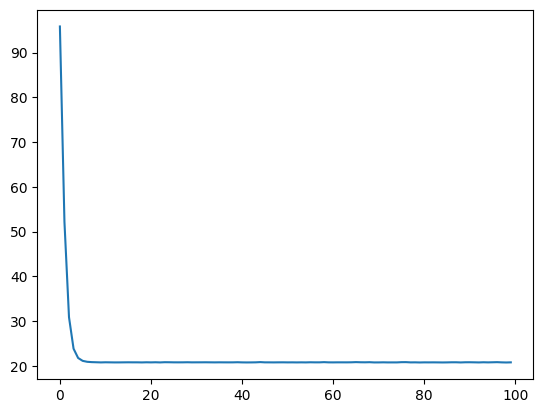

In [36]:
# 오차 변경 값 시각화 -> 성능이 좋아지는지 나빠지는지 확인
plt.plot(h.history['loss'])
plt.show()

In [37]:
# 4. 학습된 모델을 이용해서 예측을 진행해보자
model.predict(X_test['studytime'])

4/4 [==============================] - 0s 3ms/step


array([[10.33572 ],
       [10.33572 ],
       [ 9.789182],
       [10.33572 ],
       [10.33572 ],
       [10.33572 ],
       [10.33572 ],
       [ 9.789182],
       [10.683323],
       [ 9.789182],
       [ 9.789182],
       [10.33572 ],
       [10.683323],
       [10.576325],
       [10.683323],
       [ 9.789182],
       [10.576325],
       [ 9.789182],
       [ 9.789182],
       [10.33572 ],
       [10.576325],
       [10.33572 ],
       [10.33572 ],
       [10.576325],
       [10.33572 ],
       [10.33572 ],
       [10.33572 ],
       [10.683323],
       [10.33572 ],
       [10.33572 ],
       [10.576325],
       [10.33572 ],
       [10.576325],
       [ 9.789182],
       [10.576325],
       [10.576325],
       [10.33572 ],
       [10.33572 ],
       [10.33572 ],
       [10.33572 ],
       [10.33572 ],
       [10.33572 ],
       [ 9.789182],
       [ 9.789182],
       [10.576325],
       [10.33572 ],
       [ 9.789182],
       [ 9.789182],
       [10.576325],
       [10.576325],


In [38]:
# 모델 성능 측정
model.evaluate(X_test['studytime'], y_test)
# 21.0366 -> 루트 씌우면 4.XX

4/4 [==============================] - 0s 3ms/step - loss: 21.0366


21.03664779663086